In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() # load로 데이터 가져옴

In [ ]:
iris.data
# iris['target'] # 각 데이터가 0 1 2번에 해당하는지를 나타냄
# iris['target_names']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

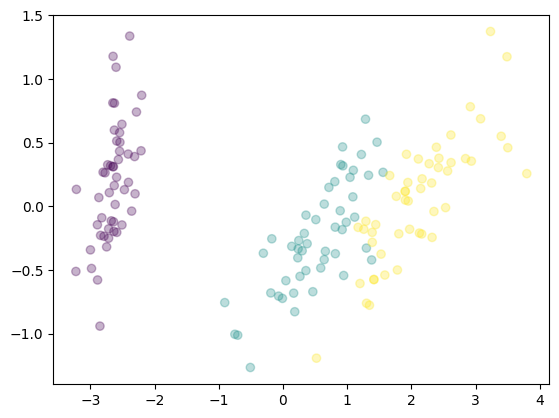

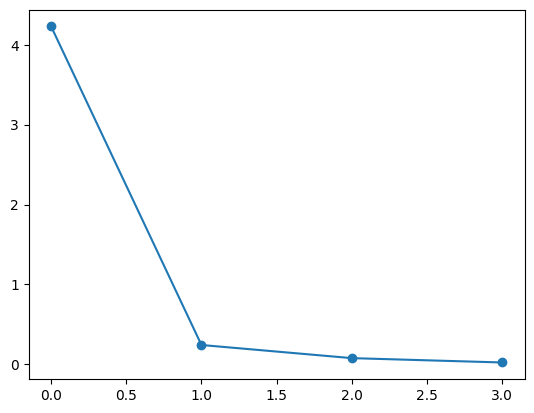

[4.22824171 0.24267075 0.0782095  0.02383509]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = iris.data

pca = PCA(n_components=4)
Y = pca.fit_transform(X)

plt.scatter(Y[:,0], Y[:,1], c=iris.target, alpha=0.3) # 1번째 축, 2번째 축
plt.show()

plt.plot(pca.explained_variance_, "-o") # 1~4 번째 축의 분산값 나타냄
plt.show()
print(pca.explained_variance_)

In [ ]:
from numpy import linalg
# covariance matrix, eigen decomposition

X = iris.data
X = X - X.mean(axis=0)

# covariance matrix
C = (X.T @ X) / X.shape[0] # 공분산 구하기
print(C)
L, Q = linalg.eigh(C) # eigen decomposition 수행

print(L)
print(Q)

Y = X @ Q

plt.scatter(Y[:,3], Y[:,2], c=iris.target, alpha=0.3)
plt.show()

[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
[0.02367619 0.0776881  0.24105294 4.20005343]
[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


NameError: ignored

[4.20005343 0.24105294 0.0776881  0.02367619]


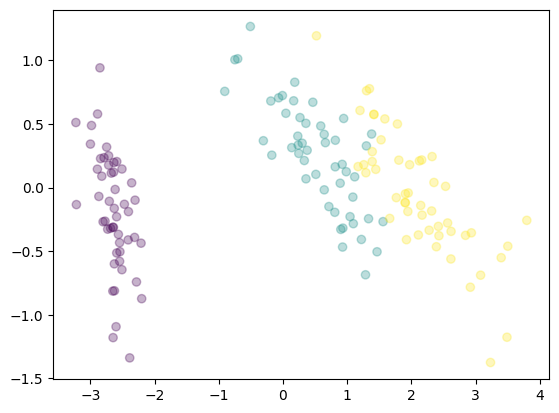

In [ ]:
# SVD
from numpy import linalg

X = iris.data
X = X - X.mean(axis=0)

U, S, VT = linalg.svd(X) # S : 분산 구하는데 사용, Q.T = VT
Q = VT.T

print(S ** 2 / X.shape[0])

Y = X @ Q
plt.scatter(Y[:,0], Y[:,1], c=iris.target, alpha=0.3)
plt.show()

4


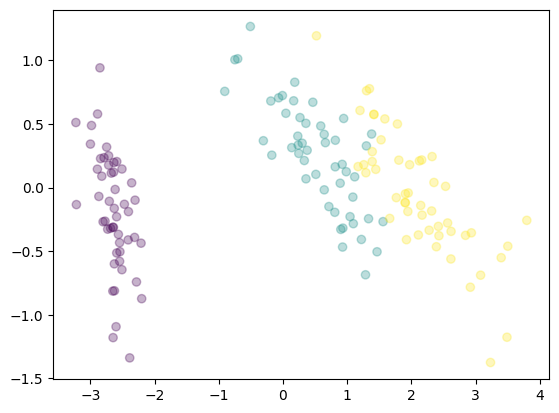

[4.20005343 0.24105294 0.0776881  0.02367619]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [ ]:
import numpy as np
from numpy import linalg
# power method

X = iris.data
X = X - X.mean(axis=0)

C = (X.T @ X) / X.shape[0]
print(C.shape[0])

L = []
Q = []

M = C.copy()

for dim in range(4):
  v = np.random.randn(4,1)
  v = v / linalg.norm(v)
  for epoch in range(20):
    vp = M @ v
    lmd = linalg.norm(vp)
    v = vp / lmd
  M = M - lmd * (v @ v.T)

  L.append(lmd)
  Q.append(v)

L = np.array(L)
Q = np.hstack(Q)

Y = X @ Q

plt.scatter(Y[:,0], Y[:,1], c=iris.target, alpha=0.3)
plt.show()

print(L)
print(Q)